In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-250-movies/movies.csv
/kaggle/input/imdb-top-250-movies/datasets/year.csv
/kaggle/input/imdb-top-250-movies/datasets/writters.json
/kaggle/input/imdb-top-250-movies/datasets/basic_movie_info.csv
/kaggle/input/imdb-top-250-movies/datasets/person_role_specific.csv
/kaggle/input/imdb-top-250-movies/datasets/basic_member_info.csv
/kaggle/input/imdb-top-250-movies/datasets/person_movie_specific.csv
/kaggle/input/imdb-top-250-movies/datasets/genre.json
/kaggle/input/imdb-top-250-movies/datasets/cast.json
/kaggle/input/imdb-top-250-movies/datasets/directors.json
/kaggle/input/imdb-top-250-movies/datasets/year.json
/kaggle/input/imdb-top-250-movies/datasets/members.csv


In [37]:
#
df = pd.read_csv('/kaggle/input/imdb-top-250-movies/movies.csv')

In [38]:
#
df

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104"
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338"
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286"
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374"
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,tt15097216,Jai Bhim,2021,190981,8.9,A,164,"Crime,Drama,Mystery","nm1421814,nm7934649,nm8904193,nm8135195,nm0695...","Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vij...",nm4377096,T.J. Gnanavel,"T.J. Gnanavel,Rajendra Sapre","nm4377096,nm13222819"
246,247,tt0103639,Aladdin,1992,406751,8.0,U,90,"Animation,Adventure,Comedy","nm0918334,nm0000245,nm0488306,nm0293455,nm0919...","Scott Weinger,Robin Williams,Linda Larkin,Jona...","nm0166256,nm0615780","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott","nm0166256,nm0615780,nm0254645"
247,248,tt0083987,Gandhi,1982,228938,8.1,U,191,"Biography,Drama","nm0001426,nm0000024,nm0368990,nm0786022,nm0000...","Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",nm0000277,Richard Attenborough,John Briley,nm0109300
248,249,tt1454029,The Help,2011,451856,8.1,UA,146,Drama,"nm1297015,nm0205626,nm0818055,nm0397171,nm1567...","Emma Stone,Viola Davis,Octavia Spencer,Bryce D...",nm0853238,Tate Taylor,"Tate Taylor,Kathryn Stockett","nm0853238,nm3543826"


In [39]:
# Top 5
df.head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104"
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338"
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286"
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374"
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627


In [40]:
#
df.tail()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
245,246,tt15097216,Jai Bhim,2021,190981,8.9,A,164,"Crime,Drama,Mystery","nm1421814,nm7934649,nm8904193,nm8135195,nm0695...","Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vij...",nm4377096,T.J. Gnanavel,"T.J. Gnanavel,Rajendra Sapre","nm4377096,nm13222819"
246,247,tt0103639,Aladdin,1992,406751,8.0,U,90,"Animation,Adventure,Comedy","nm0918334,nm0000245,nm0488306,nm0293455,nm0919...","Scott Weinger,Robin Williams,Linda Larkin,Jona...","nm0166256,nm0615780","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott","nm0166256,nm0615780,nm0254645"
247,248,tt0083987,Gandhi,1982,228938,8.1,U,191,"Biography,Drama","nm0001426,nm0000024,nm0368990,nm0786022,nm0000...","Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",nm0000277,Richard Attenborough,John Briley,nm0109300
248,249,tt1454029,The Help,2011,451856,8.1,UA,146,Drama,"nm1297015,nm0205626,nm0818055,nm0397171,nm1567...","Emma Stone,Viola Davis,Octavia Spencer,Bryce D...",nm0853238,Tate Taylor,"Tate Taylor,Kathryn Stockett","nm0853238,nm3543826"
249,250,tt0101414,Beauty and the Beast,1991,445617,8.0,U,84,"Animation,Family,Fantasy","nm0641314,nm0000913,nm0181425,nm0263591,nm0001...","Paige O'Hara,Robby Benson,Jesse Corti,Rex Ever...","nm0873779,nm0936374","Gary Trousdale,Kirk Wise","Linda Woolverton,Brenda Chapman,Chris Sanders","nm0941314,nm0152312,nm0761498"


In [41]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           250 non-null    int64  
 1   id             250 non-null    object 
 2   name           250 non-null    object 
 3   year           250 non-null    int64  
 4   imbd_votes     250 non-null    int64  
 5   imdb_rating    250 non-null    float64
 6   certificate    249 non-null    object 
 7   duration       250 non-null    object 
 8   genre          250 non-null    object 
 9   cast_id        250 non-null    object 
 10  cast_name      250 non-null    object 
 11  director_id    250 non-null    object 
 12  director_name  250 non-null    object 
 13  writter_name   250 non-null    object 
 14  writter_id     250 non-null    object 
dtypes: float64(1), int64(3), object(11)
memory usage: 29.4+ KB


In [42]:
#
df.describe()

,rank,year,imbd_votes,imdb_rating
count,250.000000,250.000000,2.500000e+02,250.000000
mean,125.500000,1986.456000,6.204287e+05,8.311200
std,72.312977,25.214423,5.014117e+05,0.229445
min,1.000000,1921.000000,2.868000e+04,8.000000
25%,63.250000,1966.250000,2.099448e+05,8.100000
50%,125.500000,1994.000000,4.823150e+05,8.250000
75%,187.750000,2006.750000,9.356730e+05,8.400000
max,250.000000,2022.000000,2.601152e+06,9.300000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imdb_rating', ylabel='Density'>

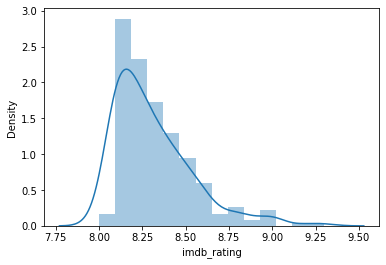

In [43]:
# Distribution plot
sns.distplot(df['imdb_rating'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rank', ylabel='Density'>

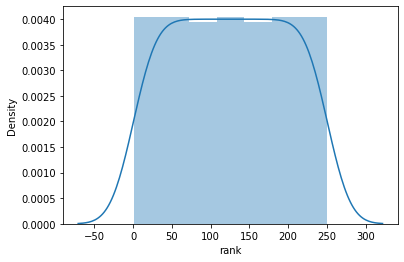

In [44]:
# Distribution plot
sns.distplot(df['rank'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

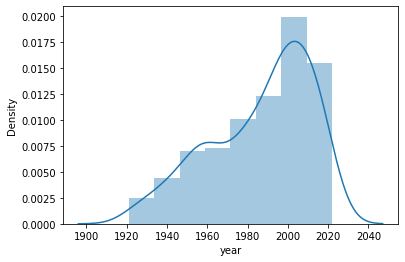

In [45]:
# Distribution plot
sns.distplot(df['year'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='imbd_votes', ylabel='Density'>

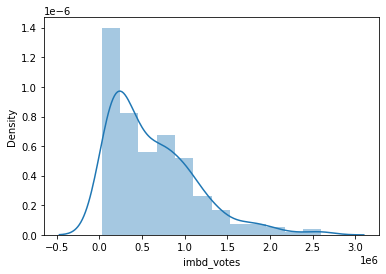

In [46]:
# Distribution plot
sns.distplot(df['imbd_votes'])

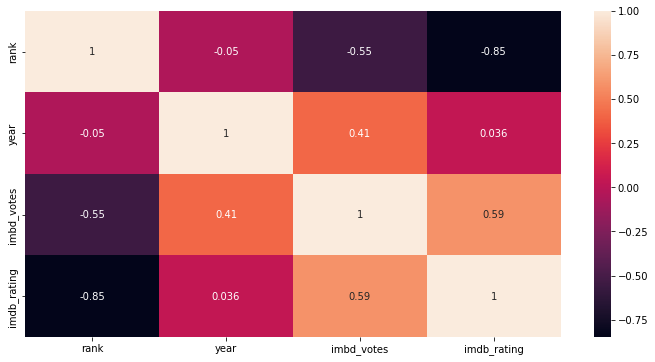

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, ax=ax);

Text(0.5, 0, 'Movies released year')

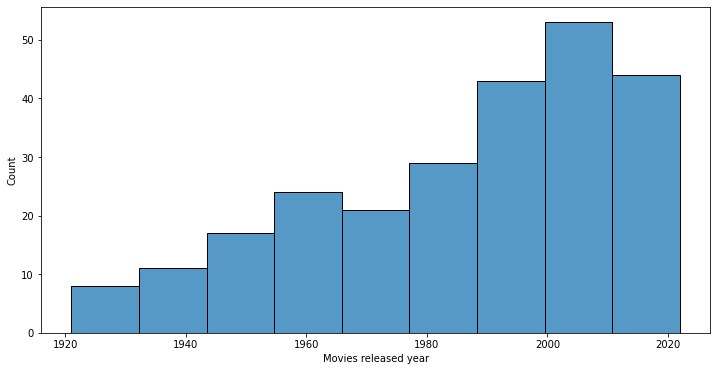

In [72]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df['year'],ax=ax)
plt.xlabel('Movies released year')

In [48]:
#
df.columns

Index(['rank', 'id', 'name', 'year', 'imbd_votes', 'imdb_rating',
       'certificate', 'duration', 'genre', 'cast_id', 'cast_name',
       'director_id', 'director_name', 'writter_name', 'writter_id'],
      dtype='object')

In [49]:
#
df.shape

(250, 15)

In [50]:
# Missing Values in dataset
df.isnull()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
# Count of null values
df.isnull().sum()

rank             0
id               0
name             0
year             0
imbd_votes       0
imdb_rating      0
certificate      1
duration         0
genre            0
cast_id          0
cast_name        0
director_id      0
director_name    0
writter_name     0
writter_id       0
dtype: int64

## 1. Top 5 movies in terms of IMDB rating

In [52]:
#
df.head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104"
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338"
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286"
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374"
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627


In [53]:
# Name of movies
df.head()['name']

0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
3       The Godfather Part II
4                12 Angry Men
Name: name, dtype: object

In [54]:
#
for name in df.head()['name'].values:
    print(name)

The Shawshank Redemption
The Godfather
The Dark Knight
The Godfather Part II
12 Angry Men


## 2. Top 5 Most voted movies

In [55]:
#
df['imbd_votes']

0      2601152
1      1796656
2      2572662
3      1237934
4       768548
        ...   
245     190981
246     406751
247     228938
248     451856
249     445617
Name: imbd_votes, Length: 250, dtype: int64

In [56]:
# Sort the dataframe 
df.sort_values(by = 'imbd_votes', ascending = False)

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104"
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286"
12,13,tt1375666,Inception,2010,2282447,8.8,UA,148,"Action,Adventure,Sci-Fi","nm0000138,nm0330687,nm0680983,nm0913822,nm0362...","Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...",nm0634240,Christopher Nolan,Christopher Nolan,nm0634240
11,12,tt0137523,Fight Club,1999,2048759,8.8,A,139,Drama,"nm0000093,nm0001570,nm0001533,nm0340260,nm0037...","Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier...",nm0000399,David Fincher,"Chuck Palahniuk,Jim Uhls","nm0657333,nm0880243"
10,11,tt0109830,Forrest Gump,1994,2009640,8.8,UA,142,"Drama,Romance","nm0000158,nm0000705,nm0000641,nm0000398,nm0931...","Tom Hanks,Robin Wright,Gary Sinise,Sally Field...",nm0000709,Robert Zemeckis,"Winston Groom,Eric Roth","nm0343165,nm0744839"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,tt0015324,Sherlock Jr.,1924,48939,8.2,Passed,45,"Action,Comedy,Romance","nm0000036,nm0570230,nm0444172,nm0175068,nm0186...","Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin...",nm0000036,Buster Keaton,"Jean C. Havez,Joseph A. Mitchell,Clyde Bruckman","nm0369841,nm0593477,nm0115669"
91,92,tt0057565,Tengoku to jigoku,1963,43333,8.4,Not Rated,143,"Crime,Drama,Mystery","nm0001536,nm0755403,nm0619938,nm0434593,nm0586...","Toshirô Mifune,Yutaka Sada,Tatsuya Nakadai,Kyô...",nm0000041,Akira Kurosawa,"Hideo Oguni,Ryûzô Kikushima,Eijirô Hisaita","nm0644823,nm0452878,nm0386750"
228,229,tt0035446,To Be or Not to Be,1942,36376,8.2,Passed,99,"Comedy,Romance,War","nm0001479,nm0000912,nm0821041,nm0107795,nm0041...","Carole Lombard,Jack Benny,Robert Stack,Felix B...",nm0523932,Ernst Lubitsch,"Melchior Lengyel,Edwin Justus Mayer,Ernst Lubi...","nm0501872,nm0562372,nm0523932"
210,211,tt0048473,Pather Panchali,1955,31958,8.3,U,125,Drama,"nm0052333,nm0052334,nm0052343,nm0222447,nm0201...","Kanu Bannerjee,Karuna Bannerjee,Subir Banerjee...",nm0006249,Satyajit Ray,"Bibhutibhushan Bandyopadhyay,Satyajit Ray","nm0051808,nm0006249"


In [57]:
# Top 5
df.sort_values(by = 'imbd_votes', ascending = False).head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
0,1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104"
2,3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286"
12,13,tt1375666,Inception,2010,2282447,8.8,UA,148,"Action,Adventure,Sci-Fi","nm0000138,nm0330687,nm0680983,nm0913822,nm0362...","Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...",nm0634240,Christopher Nolan,Christopher Nolan,nm0634240
11,12,tt0137523,Fight Club,1999,2048759,8.8,A,139,Drama,"nm0000093,nm0001570,nm0001533,nm0340260,nm0037...","Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier...",nm0000399,David Fincher,"Chuck Palahniuk,Jim Uhls","nm0657333,nm0880243"
10,11,tt0109830,Forrest Gump,1994,2009640,8.8,UA,142,"Drama,Romance","nm0000158,nm0000705,nm0000641,nm0000398,nm0931...","Tom Hanks,Robin Wright,Gary Sinise,Sally Field...",nm0000709,Robert Zemeckis,"Winston Groom,Eric Roth","nm0343165,nm0744839"


In [58]:
# Names of movies
for i in df.sort_values(by = 'imbd_votes', ascending = False).head()['name'].values:
    print(i)

The Shawshank Redemption
The Dark Knight
Inception
Fight Club
Forrest Gump


## 3. Top 5 Oldest movies in Dataframe

In [59]:
#
df.sort_values(by = 'year', ascending = True).head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
128,129,tt0012349,The Kid,1921,125041,8.3,Passed,68,"Comedy,Drama,Family","nm0000122,nm0701012,nm0001067,nm0588033,nm0042...","Charles Chaplin,Edna Purviance,Jackie Coogan,C...",nm0000122,Charles Chaplin,Charles Chaplin,nm0000122
193,194,tt0015324,Sherlock Jr.,1924,48939,8.2,Passed,45,"Action,Comedy,Romance","nm0000036,nm0570230,nm0444172,nm0175068,nm0186...","Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin...",nm0000036,Buster Keaton,"Jean C. Havez,Joseph A. Mitchell,Clyde Bruckman","nm0369841,nm0593477,nm0115669"
174,175,tt0015864,The Gold Rush,1925,110167,8.2,Passed,95,"Adventure,Comedy,Drama","nm0000122,nm0841501,nm0615306,nm0074788,nm0906...","Charles Chaplin,Mack Swain,Tom Murray,Henry Be...",nm0000122,Charles Chaplin,Charles Chaplin,nm0000122
182,183,tt0017925,The General,1926,90362,8.2,Passed,67,"Action,Adventure,Comedy","nm0000036,nm0533045,nm0147070,nm0267650,nm0089...","Buster Keaton,Marion Mack,Glen Cavender,Jim Fa...","nm0115669,nm0000036","Clyde Bruckman,Buster Keaton","Buster Keaton,Clyde Bruckman,Al Boasberg","nm0000036,nm0115669,nm0090213"
114,115,tt0017136,Metropolis,1927,172188,8.3,Not Rated,153,"Drama,Sci-Fi","nm0375609,nm0002154,nm0297054,nm0459030,nm0003...","Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudo...",nm0000485,Fritz Lang,"Thea von Harbou,Fritz Lang","nm0902376,nm0000485"


In [60]:
# Names of movies
for i in df.sort_values(by = 'year').head()['name'].values:
    print(i)

The Kid
Sherlock Jr.
The Gold Rush
The General
Metropolis


## Genre

In [61]:
#
df['genre'].unique()

array(['Drama', 'Crime,Drama', 'Action,Crime,Drama',
       'Biography,Drama,History', 'Action,Adventure,Drama',
       'Adventure,Western', 'Drama,Romance', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Fantasy', 'Action,Sci-Fi',
       'Biography,Crime,Drama', 'Crime,Drama,Mystery', 'Action,Drama',
       'Drama,Family,Fantasy', 'Crime,Drama,Thriller', 'Drama,War',
       'Comedy,Drama,Romance', 'Crime,Drama,Fantasy',
       'Adventure,Drama,Sci-Fi', 'Adventure,Comedy,Sci-Fi',
       'Animation,Adventure,Family', 'Horror,Mystery,Thriller',
       'Biography,Drama,Music', 'Comedy,Drama,Thriller',
       'Animation,Adventure,Drama', 'Drama,Mystery,Sci-Fi',
       'Drama,Romance,War', 'Drama,Music', 'Biography,Comedy,Drama',
       'Action,Drama,Mystery', 'Western', 'Animation,Drama,War',
       'Mystery,Thriller', 'Horror,Sci-Fi', 'Drama,Mystery,War',
       'Action,Adventure', 'Drama,Western', 'Drama,Mystery,Thriller',
       'Drama,Film-Noir', 'Drama,Horror', 'Comedy,Drama,War'

## 5. Number of movies with Drama Genre

In [62]:
#
count = 0
for i in df['genre']:
    if(i == 'Drama'):
        count += 1
        
print(count)        

19


There are total 19 movies in top 250 IMDB Movies in Drama Genre

In [63]:
#
#
count = 0
for i in df['genre']:
    if('Drama' in i):
        count += 1
        
print(count)

177


There 177 movies with Drama genre.

## 6. Number of movies with their genre

In [64]:
#
genre = []
for i in df['genre']:
    genre += i.split(',')
genre    

['Drama',
 'Crime',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Adventure',
 'Western',
 'Drama',
 'Romance',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Sci-Fi',
 'Biography',
 'Crime',
 'Drama',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Action',
 'Drama',
 'Drama',
 'Family',
 'Fantasy',
 'Crime',
 'Drama',
 'Thriller',
 'Crime',
 'Drama',
 'Drama',
 'War',
 'Comedy',
 'Drama',
 'Romance',
 'Crime',
 'Drama',
 'Fantasy',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Sci-Fi',
 'Adventure',
 'Comedy',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Family',
 'Horror',
 'Mystery',
 'Thriller',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Crime',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Animation',
 

In [65]:
# Unique Element
set(genre)

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [66]:
#
uniq_gen = list(set(genre))
uniq_gen

['Thriller',
 'Family',
 'Musical',
 'Western',
 'Action',
 'Biography',
 'Music',
 'Adventure',
 'Mystery',
 'Crime',
 'Film-Noir',
 'Sci-Fi',
 'Comedy',
 'Sport',
 'Romance',
 'History',
 'Drama',
 'War',
 'Fantasy',
 'Animation',
 'Horror']

In [75]:
#
len(uniq_gen)

21

In [76]:
#
df['genre'].nunique()

107

There are 107 unique Genre's Pairs in the datasets.

There are 21 unique Genres in the datasets.

In [67]:
#
for gen in uniq_gen:
    count = 0
    for i in df['genre']:
        if (gen in i):
            count += 1
    print(gen, count)        

Thriller 30
Family 13
Musical 1
Western 6
Action 49
Biography 29
Music 5
Adventure 59
Mystery 31
Crime 51
Film-Noir 4
Sci-Fi 20
Comedy 47
Sport 5
Romance 23
History 10
Drama 177
War 23
Fantasy 16
Animation 23
Horror 6


Above are the all genre of movies in Top 250 with their number of occarance.

## 7. Movies with Crime and Drama genre

In [68]:
#
df[df['genre'] == 'Crime,Drama'].head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id
1,2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338"
3,4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374"
4,5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627
7,8,tt0110912,Pulp Fiction,1994,1993957,8.9,A,154,"Crime,Drama","nm0000237,nm0000235,nm0000168,nm0000246,nm0000...","John Travolta,Uma Thurman,Samuel L. Jackson,Br...",nm0000233,Quentin Tarantino,"Quentin Tarantino,Roger Avary","nm0000233,nm0000812"
22,23,tt0317248,Cidade de Deus,2002,743932,8.6,A,130,"Crime,Drama","nm1179105,nm1129884,nm0618690,nm1249574,nm1179...","Alexandre Rodrigues,Leandro Firmino,Matheus Na...","nm0576987,nm0526199","Fernando Meirelles,Kátia Lund","Paulo Lins,Bráulio Mantovani","nm0513130,nm1130251"


## 8. Relationship between different variables

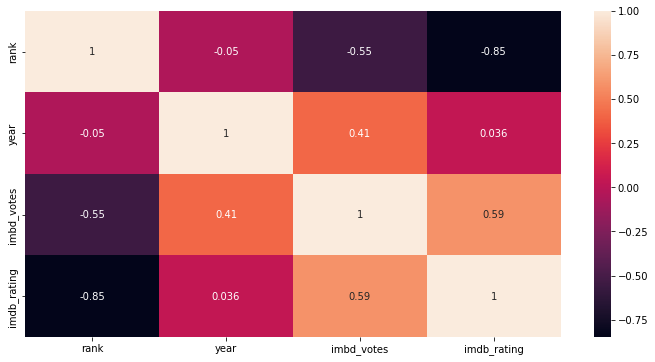

In [74]:
#
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, ax=ax);

## 9. Year with maximum number of movie released

Text(0.5, 0, 'Movies released year')

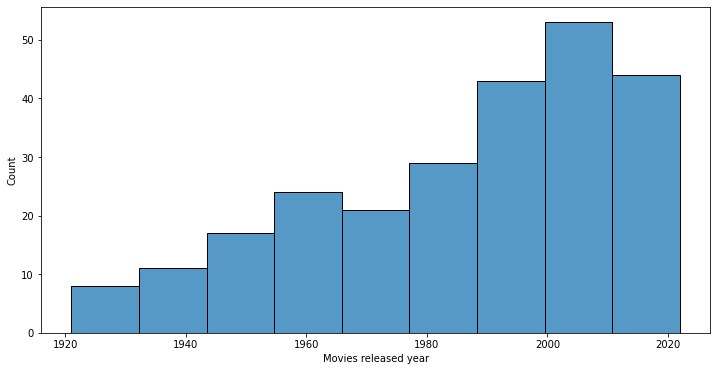

In [73]:
#
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=df['year'],ax=ax)
plt.xlabel('Movies released year')